In [165]:
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cv2
%matplotlib inline

In [3]:
ARX = pyart.io.read('/Users/rjackson/earnest/data/KARX20200810_154639_V06')
DMX = pyart.io.read('/Users/rjackson/earnest/data/KDMX20200810_171119_V06.nc')
DVN = pyart.io.read('/Users/rjackson/earnest/data/KDVN20200810_154536_V06')
FSD = pyart.io.read('/Users/rjackson/earnest/data/KFSD20200810_154321_V06')
OAX = pyart.io.read('/Users/rjackson/earnest/data/KOAX20200810_154304_V06')

(-200.0, 0.0)

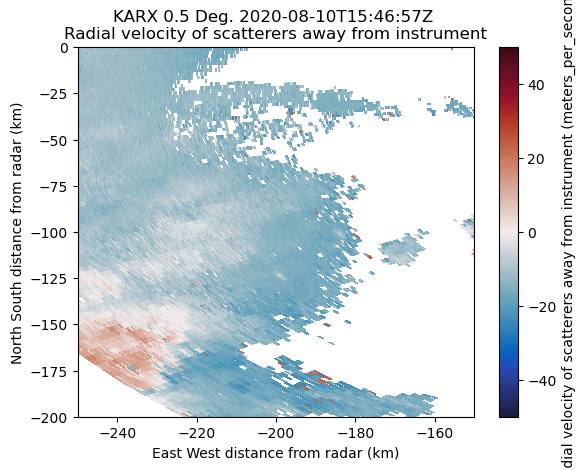

In [11]:
disp = pyart.graph.RadarMapDisplay(ARX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([-250, -150])
plt.ylim([-200, 0])

(-100.0, 100.0)

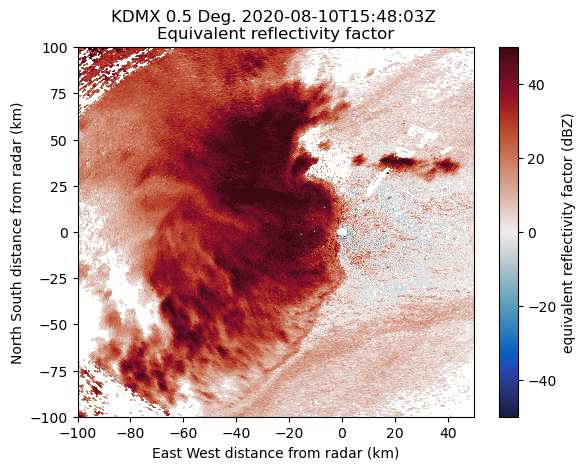

In [33]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([-100, 50])
plt.ylim([-100, 100])

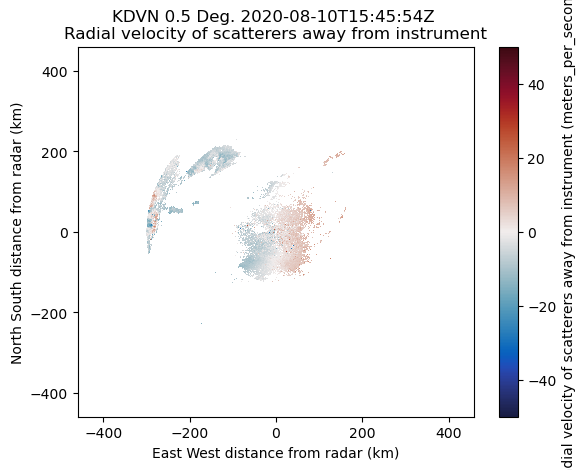

In [14]:
disp = pyart.graph.RadarMapDisplay(DVN)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
#plt.xlim([-100, 50])
#plt.ylim([-100, 100])

(0.0, 200.0)

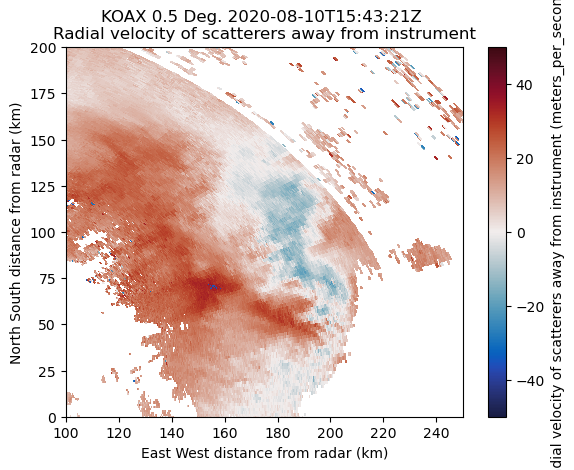

In [16]:
disp = pyart.graph.RadarMapDisplay(OAX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([100, 250])
plt.ylim([0, 200])

In [36]:
DMX_gatefilter = pyart.filters.GateFilter(DMX)
#DMX_gatefilter.exclude_below('cross_correlation_ratio', 0.9)
DMX_gatefilter.exclude_below('reflectivity', 0)
DMX_gatefilter = pyart.correct.despeckle_field(DMX, 'velocity', gatefilter=DMX_gatefilter)

(-100.0, 100.0)

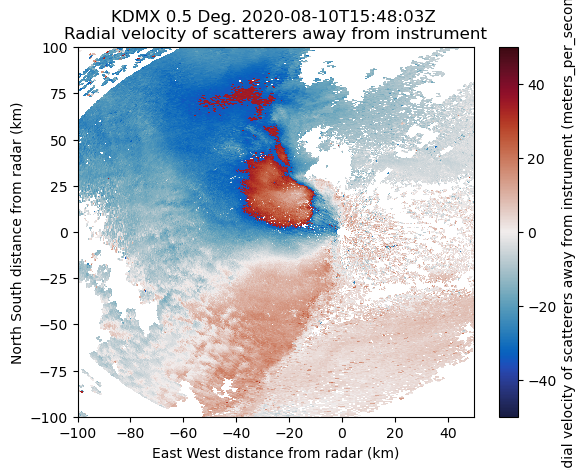

In [38]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance', gatefilter=DMX_gatefilter)
plt.xlim([-100, 50])
plt.ylim([-100, 100])

In [40]:
corrected_velocity = pyart.correct.dealias_region_based(DMX, gatefilter=DMX_gatefilter, centered=True)
DMX.add_field('corrected_velocity', corrected_velocity, replace_existing=True)

(-100.0, 100.0)

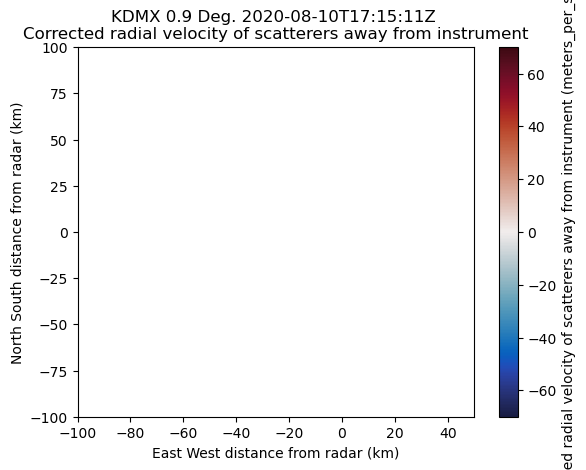

In [152]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('corrected_velocity', sweep=13, vmin=-70, vmax=70, cmap='pyart_balance', gatefilter=DMX_gatefilter)
plt.xlim([-100, 50])
plt.ylim([-100, 100])

In [150]:
OAX_gatefilter = pyart.filters.GateFilter(OAX)
#DMX_gatefilter.exclude_below('cross_correlation_ratio', 0.9)
OAX_gatefilter.exclude_below('reflectivity', 0)
OAX_gatefilter = pyart.correct.despeckle_field(OAX, 'velocity', gatefilter=OAX_gatefilter)
corrected_velocity = pyart.correct.dealias_region_based(OAX, gatefilter=OAX_gatefilter, centered=True)
OAX.add_field('corrected_velocity', corrected_velocity, replace_existing=True)

(0.0, 200.0)

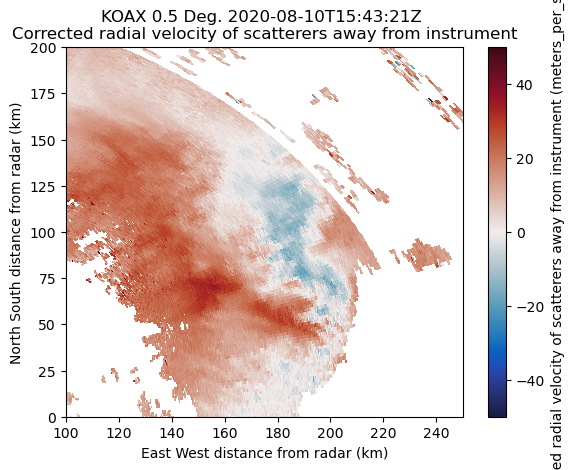

In [151]:
disp = pyart.graph.RadarMapDisplay(OAX)
disp.plot_ppi('corrected_velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([100, 250])
plt.ylim([0, 200])

In [156]:
DMX = pyart.io.read('/Users/rjackson/earnest/data/KDMX20200810_170448_V06.nc')
DMX2 = pyart.io.read('/Users/rjackson/earnest/data/KDMX20200810_171119_V06.nc')

/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/io/cfradial.py:408: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/io/cfradial.py:408: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


In [160]:
spec = (31, 301, 301)
z_limits = (0, 15000.)
x_limits = (-150000., 150000.)
y_limits = (-150000., 150000.)

DMX.fields['reflectivity']['data'] = np.ma.masked_where(DMX.fields['reflectivity']['data'] < 20, DMX.fields['reflectivity']['data'])
DMX2.fields['reflectivity']['data'] = np.ma.masked_where(DMX.fields['reflectivity']['data'] < 20, DMX.fields['reflectivity']['data'])
grid_DMX = pyart.map.grid_from_radars(DMX, grid_shape=spec, grid_limits=(z_limits, y_limits, x_limits), fields=['reflectivity'])
grid_DMX2 = pyart.map.grid_from_radars(DMX2, grid_shape=spec, grid_limits=(z_limits, y_limits, x_limits), fields=['reflectivity'])

/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


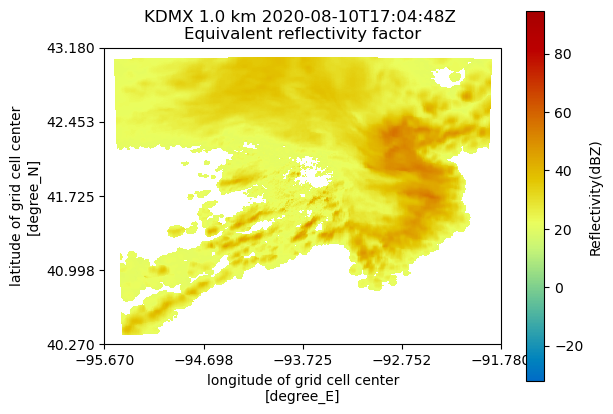

In [164]:
disp = pyart.graph.GridMapDisplay(grid_DMX)
disp.plot_grid('reflectivity', 2)

In [ ]:
cv2.optflow.

In [138]:
DMX_gatefilter = pyart.filters.GateFilter(DMX)
DMX_gatefilter.exclude_below('reflectivity', 10)
#DMX_gatefilter.exclude_above('range', 150)
DMX_gatefilter = pyart.correct.despeckle_field(DMX, 'velocity', gatefilter=DMX_gatefilter)
corrected_velocity = pyart.correct.dealias_region_based(DMX, gatefilter=DMX_gatefilter, interval_splits=6)

/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 3.
  warnings.warn(msg, UserWarning)
/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 5.
  warnings.warn(msg, UserWarning)
/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outside of the Nyquist interval found in sweep 6.
  warnings.warn(msg, UserWarning)
/Users/rjackson/mambaforge/envs/pydda_env/lib/python3.10/site-packages/pyart/correct/region_dealias.py:322: UserWarning: Velocities outs

(0.0, 100.0)

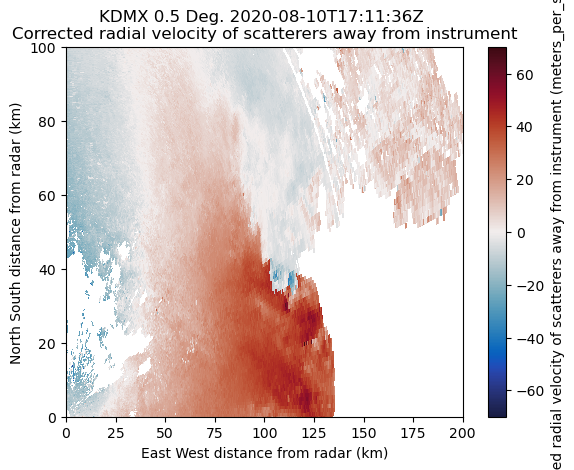

In [155]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('corrected_velocity', sweep=1, vmin=-70, vmax=70, cmap='pyart_balance', gatefilter=DMX_gatefilter,)
plt.xlim([0, 200])
plt.ylim([0, 100])

In [147]:
aws_nexrad_level3_velocity_file = (
    "s3://unidata-nexrad-level3/DMX_N3U_2020_08_10_17_11_19"
)
radar = pyart.io.read_nexrad_level3(aws_nexrad_level3_velocity_file)

In [158]:
pyart.map.grid_from_radars?

Signature:
pyart.map.grid_from_radars(
    radars,
    grid_shape,
    grid_limits,
    gridding_algo='map_gates_to_grid',
    copy_field_dtypes=True,
    **kwargs,
)
Docstring:
Map one or more radars to a Cartesian grid returning a Grid object.

Additional arguments are passed to :py:func:`map_to_grid` or
:py:func:`map_gates_to_grid`.

Parameters
----------
radars : Radar or tuple of Radar objects.
    Radar objects which will be mapped to the Cartesian grid.
grid_shape : 3-tuple of floats
    Number of points in the grid (z, y, x).
grid_limits : 3-tuple of 2-tuples
    Minimum and maximum grid location (inclusive) in meters for the
    z, y, x coordinates.
gridding_algo : 'map_to_grid' or 'map_gates_to_grid'
    Algorithm to use for gridding. 'map_to_grid' finds all gates within
    a radius of influence for each grid point, 'map_gates_to_grid' maps
    each radar gate onto the grid using a radius of influence and is
    typically significantly faster.
copy_field_dtypes : bool
    Wh

In [107]:
pyart.correct.dealias_region_based?

Signature:
pyart.correct.dealias_region_based(
    radar,
    ref_vel_field=None,
    interval_splits=3,
    interval_limits=None,
    skip_between_rays=100,
    skip_along_ray=100,
    centered=True,
    nyquist_vel=None,
    check_nyquist_uniform=True,
    gatefilter=False,
    rays_wrap_around=None,
    keep_original=False,
    set_limits=True,
    vel_field=None,
    corr_vel_field=None,
    **kwargs,
)
Docstring:
Dealias Doppler velocities using a region based algorithm.

Performs Doppler velocity dealiasing by finding regions of similar
velocities and unfolding and merging pairs of regions until all
regions are unfolded. Unfolding and merging regions is accomplished by
modeling the problem as a dynamic network reduction.

Parameters
----------
radar : Radar
    Radar object containing Doppler velocities to dealias.
ref_vel_field : str or None, optional
     Field in radar containing a reference velocity field used to anchor
     the unfolded velocities once the algorithm complete

## Attempt at TOFU in Python

* Step 1 = Grid consecutive scans at 500 m resolution, 150 km by 150 km
* Step 2 = Brox (2003) OF on Z > 20 dBZ field